# Import a specific model for the relevant application

The first step is to decide which model to use, based on your application. All available models are stored in the subfolder models. The .py files in this folder (except files starting with test_) are Python "modules" containing a class which is a subclass (specialisation) of the generic class OpenDriftSimulation.






In [1]:
from datetime import datetime, timedelta
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models.openoil import OpenOil
from opendrift.readers import reader_basemap_landmask

 A simulation instance (object) is created by calling the imported class:


In [2]:

o = OpenOil(loglevel=0)  # Set loglevel to 0 for debug information

INFO: OpenDriftSimulation initialised (version 1.0.2)


# Adding readers

Readers are independent Python objects which provide the variables (e.g. current, wind, temperature...) needed by the model to update particle properties. Readers normally read from a file (hence the name) or from a remote URL, or use some analytical function such as this idealistic eddy. Different reader classes exist for different file types. E.g. for data following the NetCDF CF-convention, use the following class:

In [3]:
# Arome atmospheric model
reader_arome = reader_netCDF_CF_generic.Reader(o.test_data_folder() + '16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc')
# Norkyst ocean model
reader_norkyst = reader_netCDF_CF_generic.Reader(o.test_data_folder() + '16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc')



INFO: Opening dataset: /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
INFO: Opening file with Dataset
DEBUG: Finding map projection.
DEBUG: Finding coordinate variables.
DEBUG: Setting buffer size 10 for reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc, assuming a maximum average speed of 5 m/s.
INFO: Opening dataset: /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
INFO: Opening file with Dataset
DEBUG: Finding map projection.
DEBUG: Finding coordinate variables.
DEBUG: Setting buffer size 25 for reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/1

The reader can be inspected with



In [4]:
print reader_arome

Reader: /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
Projection: 
  +proj=lcc +lon_0=15 +lat_0=63 +lat_1=63 +lat_2=63 +R=6.371e+06 +units=m +no_defs
Coverage: [m]
  xmin: -647442.187500   xmax: -447442.156250   step: 2500   numx: 81
  ymin: -404321.812500   ymax: -29321.800781   step: 2500   numy: 151
  Corners (lon, lat):
    (  2.45,  62.17)  (  6.27,  62.46)
    (  3.71,  58.86)  (  7.16,  59.12)
Vertical levels [m]: 
  Not specified
Available time range:
  start: 2015-11-16 00:00:00   end: 2015-11-18 18:00:00   step: 1:00:00
    67 times (0 missing)
Variables:
  latitude
  y_wind
  x_wind
  longitude
  time



The variables (e.g. wind, current...) required by a specific model are given in the list "required_variables" in the model class implementation, and may be listed by:

In [5]:
 print OpenOil.required_variables

['x_sea_water_velocity', 'y_sea_water_velocity', 'sea_surface_wave_significant_height', 'sea_surface_wave_stokes_drift_x_velocity', 'sea_surface_wave_stokes_drift_y_velocity', 'sea_ice_area_fraction', 'sea_water_temperature', 'sea_floor_depth_below_sea_level', 'x_wind', 'y_wind', 'land_binary_mask']


After Readers are created, they must be added to the model instance:

In [6]:
o.add_reader([reader_norkyst, reader_arome])

DEBUG: Setting buffer size 7 for reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc, assuming a maximum average speed of 1 m/s.
DEBUG: Calculation SRS set to: +proj=stere +lat_0=90 +lon_0=70 +lat_ts=60 +units=m +a=6.371e+06 +e=0 +no_defs +ellps=WGS84 
DEBUG: Using srs for common grid: +proj=stere +lat_0=90 +lon_0=70 +lat_ts=60 +units=m +a=6.371e+06 +e=0 +no_defs
DEBUG: Added reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Setting buffer size 4 for reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc, assuming a maximum average speed of 1 m/s.
DEBUG: Added reader /home/isabelanguiano/anaconda3/envs/Py

# Seeding elements



The simplest case is to seed a single element at a given position and time:



In [7]:
lon = 4.6; lat = 60.0;
time = [reader_arome.start_time,
        reader_arome.start_time + timedelta(hours=30)]

o.seed_elements(lon, lat, radius=50, number=3000, time=time,
                wind_drift_factor=.02)

#  Configuration

The properties which can be configured can be listed by the command:

In [9]:
o.list_configspec()

INFO: 
processes:dispersion [True] boolean(default=True)
processes:diffusion [True] boolean(default=True)
processes:evaporation [True] boolean(default=True)
processes:emulsification [True] boolean(default=True)
seed:oil_type [AASGAR] option('AASGAR', 'BALDER', 'BALDER BLEND', 'BRAGE', 'CAURUS', 'DRAUGEN', 'EDVARD GRIEG', 'EKOFISK', 'EMBLA 2000', 'ESSO FORSETI', 'FRAM SOMMER', 'FRAM VINTER', 'FROY', 'GAUPE', 'GJOA SOMMER_10', 'GJOA SOMMER_15', 'GJOA VINTER_10', 'GJOA VINTER_15', 'GLITNE SOMMER', 'GLITNE VINTER', 'GOLIAT KOBBE', 'GOLIAT REALGRUNNEN', 'GRANE', 'GUDRUN', 'GULLFAKS AB', 'GULLFAKS C', 'GULLFAKS SOR', 'GYDA', 'HEAVY (gullfaksab)', 'HEAVY GAS OIL', 'HEIDRUN', 'HEIDRUN AARE', 'HULDRA KONDENSAT', 'IF-180 ESSO', 'IF-180 LAVSVOVEL', 'IF-180 NORMALSVOVEL', 'IF-180 SHELL', 'IF-260 BUNKER', 'IF-30 BUNKER', 'IF-550 ERIKA', 'IFO-380 SLAGEN', 'IVAR AASEN (DRAUPNE)', 'JORDBAER', 'JOTUN ELLI SOMMER', 'JOTUN ELLI VINTER', 'JOTUN TAU SOMMER', 'JOTUN TAU VINTER', 'KRISTIN KONDENSAT', 'KRISTI

In [10]:
o.set_config('processes:dispersion', True)
o.set_config('processes:evaporation', True)
o.set_config('processes:emulsification', True)
o.set_config('drift:current_uncertainty', .1)
o.set_config('drift:wind_uncertainty', 1)


#  Running the model

After initialisation, adding readers and seeding elements, a model run (simulation) can be started by calling the function run:

In [11]:
o.run(end_time=reader_norkyst.end_time, time_step=1800,
      time_step_output=3600, outfile='openoil.nc',
      export_variables=['mass_oil'])

DEBUG: ------------------------------------------------------
DEBUG: Software and hardware:
DEBUG:   23 GB memory
DEBUG:   4 processors (x86_64)
DEBUG:   Basemap version 1.1.0
DEBUG:   NumPy version 1.11.3
DEBUG:   SciPy version 0.19.1
DEBUG:   Matplotlib version 2.1.0
DEBUG:   NetCDF4 version 1.3.1
DEBUG:   Python version 2.7.14 | packaged by conda-forge | (default, Nov  4 2017, 10:15:28) [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
DEBUG: ------------------------------------------------------
INFO: Config validation OK
INFO: Fallback values will be used for the following variables which have no readers: 
INFO: 	sea_surface_wave_significant_height: 0.000000
INFO: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
INFO: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
INFO: 	sea_ice_area_fraction: 0.000000
INFO: 	sea_water_temperature: 12.000000
INFO: 	sea_floor_depth_below_sea_level: 0.000000
INFO: Adding a dynamical landmask (resolution "h") based on assumed maximum speed of 1 m/s. Ad

DEBUG: Interpolating before (2015-11-16 00:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-16 01:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-16 00:00:00, weight 0.50) and
		      after (2015-11-16 01:00:00, weight 0.50) in time
DEBUG: Rotating vectors between 56.1316896 and 56.133702338 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 100 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 0 of 100 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ----------------

DEBUG: ----------------------------------------
DEBUG: Data needed for 172 elements
DEBUG: Reader time:
		2015-11-16 01:00:00 (before)
		2015-11-16 02:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 9x10x1) for time after (2015-11-16 02:00:00)
DEBUG: Interpolating before (2015-11-16 01:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-16 02:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-16 01:00:00, weight 0.50) and
		      after (2015-11-16 02:00:00, weight 0.50) in time
DEBUG: Rotating vectors between 56.1297219807 and 56.1337508736 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: --------

DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-16 02:00:00, weight 0.50) and
		      after (2015-11-16 03:00:00, weight 0.50) in time
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 248 elements
DEBUG: Reader time:
		2015-11-16 02:00:00 (before)
		2015-11-16 03:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-blo

DEBUG: Data needed for 308 elements
DEBUG: Reader time:
		2015-11-16 03:00:00 (before)
		2015-11-16 04:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 23x18x1) for time after (2015-11-16 04:00:00)
DEBUG: Interpolating before (2015-11-16 03:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-16 04:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-16 03:00:00, weight 0.50) and
		      after (2015-11-16 04:00:00, weight 0.50) in time
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: -------------------------------------

INFO: 2015-11-16 04:30:00 - step 10 of 132 - 369 active elements (131 deactivated)
DEBUG: 2500 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 369 elements
DEBUG: Reader time:
		2015-11-16 04:00:00 (before)
		2015-11-16 05:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 25x20x1) for time after (2015-11-16 05:00:0

DEBUG: Removed 24 elements.
DEBUG: Removed 24 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 23 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 380 active elements (170 deactivated)
DEBUG: to be seeded: 2450, already seeded 550
DEBUG: Released 50 new elements.
DEBUG: ======================================================================
INFO: 2015-11-16 05:30:00 - step 12 of 132 - 430 active elements (170 deactivated)
DEBUG: 2400 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader 

DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 9.3856 (min) 10.659 (max)
DEBUG:     y_wind: 16.2136 (min) 16.9036 (max)
DEBUG:     land_binary_mask: 0 (min) 0 (max)
DEBUG: ---------------------------------
DEBUG: 		457 active elements
DEBUG: 		59.999206543 <- latitude  -> 60.1195339913
DEBUG: 		4.5518640018 <- longitude -> 4.62729112313
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: Removed 20 elements.
DEBUG: Removed 20 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 18 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift vel

DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 0 of 519 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: 0.570531 (min) 0.948862 (max)
DEBUG:     y_sea_water_velocity: -0.00969702 (min) 0.307792 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 10.494 (min) 10.9803 (max)
DEBUG:     y_wind: 15.6579 (min) 16.1197 (max)
DEBUG:     land_binary_mask: 0 (min) 0 (max)
DEBUG: -----------

DEBUG: Data needed for 583 elements
DEBUG: Reader time:
		2015-11-16 08:00:00 (before)
		2015-11-16 09:00:00 (after)
DEBUG: Interpolating before (2015-11-16 08:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Rotating vectors between 56.1295780977 and 56.1424225024 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 583 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 0 of 583 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all var

DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 640 elements
DEBUG: Reader time:
		2015-11-16 09:00:00 (before)
		2015-11-16 10:00:00 (after)
DEBUG: Interpolating before (2015-11-16 09:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Rotating vectors between 56.1281080748 and 56.1433971248 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ------------

DEBUG: 1950 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 699 elements
DEBUG: Reader time:
		2015-11-16 10:00:00 (before)
		2015-11-16 11:00:00 (after)
DEBUG: Interpolating before (2015-11-16 10:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_w

DEBUG: Removed 23 elements.
DEBUG: Removed 23 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 8 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 696 active elements (404 deactivated)
DEBUG: to be seeded: 1900, already seeded 1100
DEBUG: Released 50 new elements.
DEBUG: ======================================================================
INFO: 2015-11-16 11:00:00 - step 23 of 132 - 746 active elements (404 deactivated)
DEBUG: 1850 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader 

DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 5.09647 (min) 10.4627 (max)
DEBUG:     y_wind: -14.2122 (min) -3.06988 (max)
DEBUG:     land_binary_mask: 0 (min) 0 (max)
DEBUG: ---------------------------------
DEBUG: 		788 active elements
DEBUG: 		59.9992103577 <- latitude  -> 60.2845605774
DEBUG: 		4.53869190653 <- longitude -> 4.72388327106
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: Writing history for 21 deactivated elements
DEBUG: Removed 21 elements.
DEBUG: Removed 21 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 19 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity availa

DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: 0.109102 (min) 0.6251 (max)
DEBUG:     y_sea_water_velocity: -0.796751 (min) -0.117801 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 6.29772 (min) 8.42323 (max)
DEBUG:     y_wind: -11.4181 (min) -8.84247 (max)
DEBUG:     land_binary_mask: 0 (min) 0 (max)
DEBUG: ---------------------------------
DEBUG: 		848 active elements
DEBUG: 		59.999042511 <- latitude  -> 60.2904

DEBUG: Rotating vectors between 56.1080476759 and 56.1337271728 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 911 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 0 of 911 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: -0.0581194 (min) 0.44943 (max)
DEBUG:     y_sea_water_velocity: -0.834718 (min) -0.00812082 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_s

DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 15x21x1) for time after (2015-11-16 15:00:00)
DEBUG: Interpolating before (2015-11-16 14:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-16 15:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-16 14:00:00, weight 0.50) and
		      after (2015-11-16 15:00:00, weight 0.50) in time
DEBUG: Rotating vectors between 56.1044363689 and 56.1337444854 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 973 elements
DEBUG: R

DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 1036 elements
DEBUG: Reader time:
		2015-11-16 15:00:00 (before)
		2015-11-16 16:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 15x22x1) for time after (2015-11-16 16:00:00)
DEBUG: Interpolating before (2015-11-16 15:00:00) in space  (linearNDFast)
DEBUG: Initialising interpo

DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 61x46x1) for time after (2015-11-16 17:00:00)
DEBUG: Interpolating before (2015-11-16 16:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-16 17:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-16 16:00:00, weight 0.50) and
		      after (2015-11-16 17:00:00, weight 0.50) in time
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py

DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 1163 elements
DEBUG: Reader time:
		2015-11-16 17:00:00 (before)
		2015-11-16 18:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 65x47x1) for time after (2015-11-16 18:00:00)
DEBUG: Interpolating before (2015-11-16 17:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DE

DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 20 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 1166 active elements (684 deactivated)
DEBUG: to be seeded: 1150, already seeded 1850
DEBUG: Released 50 new elements.
DEBUG: ======================================================================
INFO: 2015-11-16 18:30:00 - step 38 of 132 - 1216 active elements (684 deactivated)
DEBUG: 1100 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/t

DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 11.0748 (min) 14.8607 (max)
DEBUG:     y_wind: -3.28537 (min) -1.14228 (max)
DEBUG:     land_binary_mask: 0 (min) 0 (max)
DEBUG: ---------------------------------
DEBUG: 		1246 active elements
DEBUG: 		59.9936359484 <- latitude  -> 60.4130142413
DEBUG: 		4.59809684753 <- longitude -> 4.93400077821
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: Removed 24 elements.
DEBUG: Removed 24 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 14 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsifica

DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 1308 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 0 of 1308 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: 0.252596 (min) 1.01558 (max)
DEBUG:     y_sea_water_velocity: -0.111947 (min) 0.735397 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBU

DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 1354 elements
DEBUG: Reader time:
		2015-11-16 21:00:00 (before)
		2015-11-16 22:00:00 (after)
DEBUG: Interpolating before (2015-11-16 21:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Rotating vectors between 56.0957836197 and 56.1343964415 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 1354 elements
DEBUG: Reader t

DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 1428 elements
DEBUG: Reader time:
		2015-11-16 22:00:00 (before)
		2015-11-16 23:00:00 (after)
DEBUG: Interpolating before (2015-11-16 22:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-package

DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 31 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 1432 active elements (868 deactivated)
DEBUG: to be seeded: 700, already seeded 2300
DEBUG: Released 50 new elements.
DEBUG: ======================================================================
INFO: 2015-11-16 23:00:00 - step 47 of 132 - 1482 active elements (868 deactivated)
DEBUG: 650 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packag

DEBUG:     x_sea_water_velocity: 0.122249 (min) 1.02765 (max)
DEBUG:     y_sea_water_velocity: -0.375195 (min) 0.80526 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 12.0747 (min) 17.3908 (max)
DEBUG:     y_wind: -0.755604 (min) 3.74048 (max)
DEBUG:     land_binary_mask: 0 (min) 1 (max)
DEBUG: ---------------------------------
DEBUG: 		1497 active elements
DEBUG: 		59.9991188049 <- latitude  -> 60.5558438203
DEBUG: 		4.59449736417 <- longitude -> 4.97850163658
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: 9 elements scheduled for deactivation (stranded)
DEBUG: Writing history for 23 deactivated elements
DEBUG: Removed 23 elements.


DEBUG: Interpolating after (2015-11-17 01:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-17 00:00:00, weight 0.50) and
		      after (2015-11-17 01:00:00, weight 0.50) in time
DEBUG: Rotating vectors between 56.0919987013 and 56.1337597087 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 1538 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 67 of 1538 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY ---

DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 1519 elements
DEBUG: Reader time:
		2015-11-17 01:00:00 (before)
		2015-11-17 02:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 19x35x1) for time after (2015-11-17 02:00:00)
DEBUG: Interpolating before (2015-11-17 01:00:00) in space  (linearNDFast)
DEBUG: Initialising interpo

DEBUG: Data needed for 1512 elements
DEBUG: Reader time:
		2015-11-17 02:00:00 (before)
		2015-11-17 03:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 100x60x1) for time after (2015-11-17 03:00:00)
DEBUG: Interpolating before (2015-11-17 02:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-17 03:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: NaN values for 278 elements, expanding data 1
DEBUG: NaN values for 68 elements, expanding data 2
DEBUG: NaN values for 10 elements, expanding data 3
DEBUG: NaN values for 249 elements, expanding data 1
DEBUG: NaN values for 54 elements, expanding data 2
DEBUG: Interpolating before (2015-11-17 02:00:00, weight 0.50) and
		      after (2015-11-17 03:00:00, weight 0.50) in t

DEBUG: 21 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 1467 active elements (1283 deactivated)
DEBUG: to be seeded: 250, already seeded 2750
DEBUG: Released 50 new elements.
DEBUG: ======================================================================
INFO: 2015-11-17 03:30:00 - step 56 of 132 - 1517 active elements (1283 deactivated)
DEBUG: 200 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16No

DEBUG:     x_sea_water_velocity: -0.0521448 (min) 0.62665 (max)
DEBUG:     y_sea_water_velocity: -0.784271 (min) 0.523471 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 10.0713 (min) 18.1179 (max)
DEBUG:     y_wind: -0.55696 (min) 2.55952 (max)
DEBUG:     land_binary_mask: 0 (min) 1 (max)
DEBUG: ---------------------------------
DEBUG: 		1504 active elements
DEBUG: 		59.9990539551 <- latitude  -> 60.6795524064
DEBUG: 		4.59789085388 <- longitude -> 4.98792561357
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: 57 elements scheduled for deactivation (stranded)
DEBUG: Removed 76 elements.
DEBUG: Removed 76 values from environment.
DEBUG

DEBUG: ----------------------------------------
DEBUG: Data needed for 1442 elements
DEBUG: Reader time:
		2015-11-17 05:00:00 (before)
		2015-11-17 06:00:00 (after)
DEBUG: Interpolating before (2015-11-17 05:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Rotating vectors between 56.0905775873 and 56.1337010826 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 1442 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 110 of 1442 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------

DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 1334 elements
DEBUG: Reader time:
		2015-11-17 06:00:00 (before)
		2015-11-17 07:00:00 (after)
DEBUG: Interpolating before (2015-11-17 06:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface

DEBUG: Writing history for 54 deactivated elements
DEBUG: Removed 54 elements.
DEBUG: Removed 54 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 4 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 1202 active elements (1798 deactivated)
DEBUG: to be seeded: 0, already seeded 3000
DEBUG: ======================================================================
INFO: 2015-11-17 07:00:00 - step 63 of 132 - 1202 active elements (1798 deactivated)
DEBUG: 0 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG:

DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: 0.0897408 (min) 0.80661 (max)
DEBUG:     y_sea_water_velocity: -0.265672 (min) 0.552169 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 9.47985 (min) 19.4749 (max)
DEBUG:     y_wind: 0.668483 (min) 5.09792 (max)
DEBUG:     land_binary_mask: 0 (min) 1 (max)
DEBUG: ---------------------------------
DEBUG: 		1147 active elements
DEBUG: 		60.034111617 <- latitude  -> 60.7545347808
DEBUG: 		4.6019846972 <- longitude -> 4.99252490842
DEBUG: 		z = 0.0
DEBUG: ---------------------------------


DEBUG: Interpolating before (2015-11-17 08:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-17 09:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-17 08:00:00, weight 0.50) and
		      after (2015-11-17 09:00:00, weight 0.50) in time
DEBUG: Rotating vectors between 56.0932150619 and 56.1336611101 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 1067 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 38 of 1067 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------

DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 1006 elements
DEBUG: Reader time:
		2015-11-17 09:00:00 (before)
		2015-11-17 10:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 20x39x1) for time after (2015-11-17 10:00:00)
DEBUG: Interpolating before (2015-11-17 09:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-17 10:00:00) in space  (linearNDFast)
DEBUG

DEBUG: Fetched env-block (size 108x61x1) for time after (2015-11-17 11:00:00)
DEBUG: Interpolating before (2015-11-17 10:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: NaN values for 1 elements, expanding data 1
DEBUG: Interpolating after (2015-11-17 11:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: NaN values for 166 elements, expanding data 1
DEBUG: NaN values for 9 elements, expanding data 2
DEBUG: NaN values for 1 elements, expanding data 3
DEBUG: NaN values for 178 elements, expanding data 1
DEBUG: NaN values for 5 elements, expanding data 2
DEBUG: Interpolating before (2015-11-17 10:00:00, weight 0.50) and
		      after (2015-11-17 11:00:00, weight 0.50) in time
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: 

INFO: 2015-11-17 11:30:00 - step 72 of 132 - 865 active elements (2135 deactivated)
DEBUG: 0 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 865 elements
DEBUG: Reader time:
		2015-11-17 11:00:00 (before)
		2015-11-17 12:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 106x61x1) for time after (2015-11-17 12:00:00

DEBUG: ---------------------------------
DEBUG: 		808 active elements
DEBUG: 		60.1877989287 <- latitude  -> 60.8740128816
DEBUG: 		4.61267136253 <- longitude -> 4.9633825374
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: 48 elements scheduled for deactivation (stranded)
DEBUG: Removed 49 elements.
DEBUG: Removed 49 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 1 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 759 active elements (2241 deactivated)
DEBUG: to be seeded: 0, already seeded 3000
DEBUG: ======================================================================
INFO: 2015-11-17 12:30:00 - step 74 of 132 - 759 active elements (2241 deactivated)
DEBUG: 0 elements scheduled.
DEBUG: =======

DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: -0.119391 (min) 0.844177 (max)
DEBUG:     y_sea_water_velocity: -0.310742 (min) 0.500003 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 10.5329 (min) 18.0405 (max)
DEBUG:     y_wind: -5.26065 (min) 3.10296 (max)
DEBUG:     land_binary_mask: 0 (min) 1 (max)
DEBUG: ---------------------------------
DEBUG: 		708 active elements
DEBUG: 		60.2172631581 <- latitude  -> 60.8745315989
DEBUG: 		4.633715

DEBUG: Data needed for 621 elements
DEBUG: Reader time:
		2015-11-17 14:00:00 (before)
		2015-11-17 15:00:00 (after)
DEBUG: Interpolating before (2015-11-17 14:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Rotating vectors between 56.0953293781 and 56.1256491356 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 621 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 81 of 621 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all va

DEBUG: ----------------------------------------
DEBUG: Data needed for 523 elements
DEBUG: Reader time:
		2015-11-17 15:00:00 (before)
		2015-11-17 16:00:00 (after)
DEBUG: Interpolating before (2015-11-17 15:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 523 elements
DEBUG: Reader time:
		2015-11-17 15:00:00 (before)
		2015-11-17 16:00:00 (after)
DEBUG: Interpolating before (2015-11-17 15:00:00) in 

DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 468 active elements (2532 deactivated)
DEBUG: to be seeded: 0, already seeded 3000
DEBUG: ======================================================================
INFO: 2015-11-17 16:00:00 - step 81 of 132 - 468 active elements (2532 deactivated)
DEBUG: 0 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 468 elements
DEBUG: Reader time:
		2015-11-17 16:00:00 (

DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 7.09649 (min) 13.515 (max)
DEBUG:     y_wind: -3.03214 (min) 0.252811 (max)
DEBUG:     land_binary_mask: 0 (min) 1 (max)
DEBUG: ---------------------------------
DEBUG: 		448 active elements
DEBUG: 		60.2685414318 <- latitude  -> 60.9605280427
DEBUG: 		4.75707878661 <- longitude -> 4.95533087239
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: 17 elements scheduled for deactivation (stranded)
DEBUG: Writing history for 17 deactivated elements
DEBUG: Removed 17 elements.
DEBUG: Removed 17 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 1 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 431 active elements (2569 deactivate

DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 30 of 419 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: -0.0498682 (min) 0.614721 (max)
DEBUG:     y_sea_water_velocity: -0.400202 (min) 0.646685 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 6.66783 (min) 12.3541 (max)
DEBUG:     y_wind: -2.04226 (min) 0.359752 (max)
DEBUG:     land_binary_mask: 0 (min) 1 (max)
DEBUG: -------

DEBUG: Interpolating before (2015-11-17 18:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-17 19:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-17 18:00:00, weight 0.50) and
		      after (2015-11-17 19:00:00, weight 0.50) in time
DEBUG: Rotating vectors between 56.0950916554 and 56.1149672671 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 382 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 27 of 382 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: -----------

DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 349 elements
DEBUG: Reader time:
		2015-11-17 19:00:00 (before)
		2015-11-17 20:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 13x39x1) for time after (2015-11-17 20:00:00)
DEBUG: Interpolating before (2015-11-17 19:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-17 20:00:00) in space  (linearNDFast)
DEBUG:

DEBUG: Fetched env-block (size 98x62x1) for time after (2015-11-17 21:00:00)
DEBUG: Interpolating before (2015-11-17 20:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-17 21:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: NaN values for 28 elements, expanding data 1
DEBUG: NaN values for 5 elements, expanding data 2
DEBUG: NaN values for 27 elements, expanding data 1
DEBUG: NaN values for 5 elements, expanding data 2
DEBUG: Interpolating before (2015-11-17 20:00:00, weight 0.50) and
		      after (2015-11-17 21:00:00, weight 0.50) in time
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-p

DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 313 elements
DEBUG: Reader time:
		2015-11-17 21:00:00 (before)
		2015-11-17 22:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 99x61x1) for time after (2015-11-17 22:00:00)
DEBUG: Interpolating before (2015-11-17 21:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-17 22:00:00) in space  (linearNDFast)
DEBUG: 

DEBUG: 5 elements scheduled for deactivation (stranded)
DEBUG: Removed 6 elements.
DEBUG: Removed 6 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 300 active elements (2700 deactivated)
DEBUG: to be seeded: 0, already seeded 3000
DEBUG: ======================================================================
INFO: 2015-11-17 22:30:00 - step 94 of 132 - 300 active elements (2700 deactivated)
DEBUG: 0 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Pytho

DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 7.59431 (min) 13.7697 (max)
DEBUG:     y_wind: -3.2636 (min) 1.49103 (max)
DEBUG:     land_binary_mask: 0 (min) 1 (max)
DEBUG: ---------------------------------
DEBUG: 		296 active elements
DEBUG: 		60.3627064932 <- latitude  -> 61.053786946
DEBUG: 		4.78668276174 <- longitude -> 4.96060921717
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: 10 elements scheduled for deactivation (stranded)
DEBUG: Removed 10 elements.
DEBUG: Removed 10 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG:    Calculating: emulsification
D

DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 282 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 35 of 282 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: -0.142402 (min) 0.515211 (max)
DEBUG:     y_sea_water_velocity: -0.292153 (min) 0.363536 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEB

DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 247 elements
DEBUG: Reader time:
		2015-11-18 01:00:00 (before)
		2015-11-18 02:00:00 (after)
DEBUG: Interpolating before (2015-11-18 01:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Rotating vectors between 56.0952214332 and 56.1130964911 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: -------

DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 212 elements
DEBUG: Reader time:
		2015-11-18 02:00:00 (before)
		2015-11-18 03:00:00 (after)
DEBUG: Interpolating before (2015-11-18 02:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: No time interpolation needed - right on time.
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ---------

DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: 54 elements scheduled for deactivation (stranded)
DEBUG: Writing history for 55 deactivated elements
DEBUG: Removed 55 elements.
DEBUG: Removed 55 values from environment.
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG: 1 elements scheduled for deactivation (evaporated)
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 130 active elements (2870 deactivated)
DEBUG: to be seeded: 0, already seeded 3000
DEBUG: ======================================================================
INFO: 2015-11-18 03:00:00 - step 103 of 132 - 130 active elements (2870 deactivated)
DEBUG: 0 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Vari

DEBUG:     x_sea_water_velocity: -0.197379 (min) 0.313915 (max)
DEBUG:     y_sea_water_velocity: -0.142833 (min) 0.280059 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: 5.82633 (min) 8.75362 (max)
DEBUG:     y_wind: -4.6243 (min) -1.33607 (max)
DEBUG:     land_binary_mask: 0 (min) 1 (max)
DEBUG: ---------------------------------
DEBUG: 		86 active elements
DEBUG: 		60.4407295174 <- latitude  -> 61.0585420288
DEBUG: 		4.82204544778 <- longitude -> 4.96654504787
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: 48 elements scheduled for deactivation (stranded)
DEBUG: Writing history for 48 deactivated elements
DEBUG: Removed 48 elements.

DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 16 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 15 of 16 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - right on time.
DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: -0.0251981 (min) 0.316173 (max)
DEBUG:     y_sea_water_velocity: -0.12264 (min) 0.258666 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_dr

DEBUG: Fetched env-block (size 13x33x1) for time after (2015-11-18 06:00:00)
DEBUG: Interpolating before (2015-11-18 05:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-18 06:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-18 05:00:00, weight 0.50) and
		      after (2015-11-18 06:00:00, weight 0.50) in time
DEBUG: Rotating vectors between 56.0906612017 and 56.0980586925 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ----------------------------------------
DEBUG: Calling reader basemap_landmask
DEBUG: ----------------------------------------
DEBUG: Data needed for 4 elements
DEBUG: Reader time:
		None (before)
		None (after)
DEBUG: Fetching variables from basemap_landmask
DEBUG: Checking 3 of 4 coordinates to polygons
DEBUG: Fetched env-before
DEBUG: No time interpolation needed - 

DEBUG: ----------------------------------------
DEBUG: Data needed for 2 elements
DEBUG: Reader time:
		2015-11-18 06:00:00 (before)
		2015-11-18 07:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 13x32x1) for time after (2015-11-18 07:00:00)
DEBUG: Interpolating before (2015-11-18 06:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-18 07:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-18 06:00:00, weight 0.50) and
		      after (2015-11-18 07:00:00, weight 0.50) in time
DEBUG: Rotating vectors between 56.0906986372 and 56.0970625871 degrees.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['land_binary_mask']
DEBUG: ---------

DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 2 elements
DEBUG: Reader time:
		2015-11-18 07:00:00 (before)
		2015-11-18 08:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 13x32x1) for time after (2015-11-18 08:00:00)
DEBUG: Interpolating before (2015-11-18 07:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-18 08:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating before (2015-11-18 07:00:00, weight 0.50

DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 2 elements
DEBUG: Reader time:
		2015-11-18 08:00:00 (before)
		2015-11-18 09:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 13x31x1) for time after (2015-11-18 09:00:00)
DEBUG: Interpolating before (2015-11-18 08:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolat

DEBUG: Interpolating before (2015-11-18 09:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-18 10:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: NaN values for 1 elements, expanding data 1
DEBUG: NaN values for 1 elements, expanding data 1
DEBUG: Interpolating before (2015-11-18 09:00:00, weight 0.50) and
		      after (2015-11-18 10:00:00, weight 0.50) in time
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_wind', 'x_wind']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 2 elements
DEBUG: Reader time:


DEBUG: Reader time:
		2015-11-18 10:00:00 (before)
		2015-11-18 11:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 79x40x1) for time after (2015-11-18 11:00:00)
DEBUG: Interpolating before (2015-11-18 10:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-18 11:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: NaN values for 1 elements, expanding data 1
DEBUG: NaN values for 1 elements, expanding data 1
DEBUG: Interpolating before (2015-11-18 10:00:00, weight 0.50) and
		      after (2015-11-18 11:00:00, weight 0.50) in time
DEBUG: Reader SRS is the same as calculation SRS - rotation of vectors is not needed.
DEBUG: Obtained data for all elements.
DEBUG: ----------------------------------------
DEBUG: Variable group

DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 2 elements
DEBUG: Reader time:
		2015-11-18 11:00:00 (before)
		2015-11-18 12:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: Fetched env-block (size 79x38x1) for time after (2015-11-18 12:00:00)
DEBUG: Interpolating before (2015-11-18 11:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: Interpolating after (2015-11-18 12:00:00) in space  (linearNDFast)
DEBUG: Initialising interpolator.
DEBUG: NaN values for 1 elements, expanding data 1
DEBUG: NaN values for 1 elements, expanding

DEBUG: ======================================================================
INFO: 2015-11-18 12:30:00 - step 122 of 132 - 2 active elements (2998 deactivated)
DEBUG: 0 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: ----------------------------------------
DEBUG: Data needed for 2 elements
DEBUG: Reader time:
		2015-11-18 12:00:00 (before)
		2015-11-18 13:00:00 (after)
DEBUG: Fetching variables from /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
D

DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 2 active elements (2998 deactivated)
DEBUG: to be seeded: 0, already seeded 3000
DEBUG: ======================================================================
INFO: 2015-11-18 13:30:00 - step 124 of 132 - 2 active elements (2998 deactivated)
DEBUG: 0 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------
DEBUG: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity']
DEBUG: ----------------------------------------
DEBUG: Calling reader /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
DEBUG: --------------------

DEBUG:     land_binary_mask: 0 (min) 0 (max)
DEBUG: ---------------------------------
DEBUG: 		2 active elements
DEBUG: 		60.5865866294 <- latitude  -> 61.0666228076
DEBUG: 		4.92353414302 <- longitude -> 5.00121018585
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: No elements to deactivate
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 2 active elements (2998 deactivated)
DEBUG: to be seeded: 0, already seeded 3000
DEBUG: ======================================================================
INFO: 2015-11-18 14:30:00 - step 126 of 132 - 2 active elements (2998 deactivated)
DEBUG: 0 elements scheduled.
DEBUG: ======================================================================
DEBUG: ----------------------------------------


DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: -2.32769 (min) 0.843072 (max)
DEBUG:     y_wind: 2.56308 (min) 2.81232 (max)
DEBUG:     land_binary_mask: 0 (min) 0 (max)
DEBUG: ---------------------------------
DEBUG: 		2 active elements
DEBUG: 		60.5913835545 <- latitude  -> 61.0583818652
DEBUG: 		4.91885983599 <- longitude -> 5.00000741755
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: No elements to deactivate
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion
DEBUG: Applying wind drift factor of 0.019999999553 to elements at surface
DEBUG: No Stokes drift velocity available
DEBUG: 2 active elements (2998 deactivated)
DEBUG: to be seeded: 0, already seeded 3000
DEBUG: ===================================================

DEBUG:     y_sea_water_velocity: 0.102953 (min) 0.262085 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: -0.487747 (min) 3.04316 (max)
DEBUG:     y_wind: 2.99961 (min) 4.6516 (max)
DEBUG:     land_binary_mask: 0 (min) 0 (max)
DEBUG: ---------------------------------
DEBUG: 		2 active elements
DEBUG: 		60.5954676856 <- latitude  -> 61.0554315587
DEBUG: 		4.91069525982 <- longitude -> 4.99489537616
DEBUG: 		z = 0.0
DEBUG: ---------------------------------
DEBUG: No elements to deactivate
DEBUG: Calling OpenOil.update()
DEBUG: Default oil weathering
DEBUG:    Calculating: evaporation
DEBUG:    Calculating: emulsification
DEBUG:    Calculating: dispersion

DEBUG: Obtained data for all elements.
DEBUG: ---------------------------------------
DEBUG: Finished processing all variable groups
DEBUG: ------------ SUMMARY -------------
DEBUG:     x_sea_water_velocity: -0.222579 (min) 0.0322896 (max)
DEBUG:     y_sea_water_velocity: 0.0306372 (min) 0.231678 (max)
DEBUG:     sea_surface_wave_significant_height: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
DEBUG:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
DEBUG:     sea_ice_area_fraction: 0 (min) 0 (max)
DEBUG:     sea_water_temperature: 12 (min) 12 (max)
DEBUG:     sea_floor_depth_below_sea_level: 0 (min) 0 (max)
DEBUG:     x_wind: -0.869555 (min) 2.02344 (max)
DEBUG:     y_wind: 1.1651 (min) 4.79407 (max)
DEBUG:     land_binary_mask: 0 (min) 0 (max)
DEBUG: ---------------------------------
DEBUG: 		2 active elements
DEBUG: 		60.6038671601 <- latitude  -> 61.0491542925
DEBUG: 		4.8960225437 <- longitude -> 4.9791698839
DEBUG: 		z = 0.0
DEB

Print and plot results

In [12]:
print o

Model:	OpenOil     (OpenDrift version 1.0.2)
	2 active Oil particles  (2998 deactivated, 0 scheduled)
Projection: +proj=stere +lat_0=90 +lon_0=70 +lat_ts=60 +units=m +a=6.371e+06 +e=0 +no_defs
-------------------
Environment variables:
  -----
  x_sea_water_velocity
  y_sea_water_velocity
     1) /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/norkyst800_subset_16Nov2015.nc
  -----
  x_wind
  y_wind
     1) /home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/OpenDrift-1.0.2-py2.7.egg/tests/test_data/16Nov2015_NorKyst_z_surface/arome_subset_16Nov2015.nc
  -----
  land_binary_mask
     1) basemap_landmask
  -----
Readers not added for the following variables:
  sea_floor_depth_below_sea_level
  sea_ice_area_fraction
  sea_surface_wave_significant_height
  sea_surface_wave_stokes_drift_x_velocity
  sea_surface_wave_stokes_drift_y_velocity
  sea_water_temperature
Time:
	Start

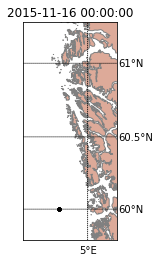

INFO: Saving animation to openoil_time_seed.gif...
INFO: Making animated gif...


In [15]:
o.animation()
o.animation(filename='openoil_time_seed.gif')


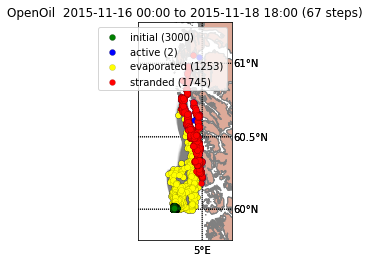

(<mpl_toolkits.basemap.Basemap at 0x7f0824eee590>,
 <module 'matplotlib.pyplot' from '/home/isabelanguiano/anaconda3/envs/Python27/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>)

In [16]:
o.plot()